In [58]:
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron, LogisticRegression
from mlxtend.classifier import Adaline
from mlxtend.data import iris_data
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.special import expit

In [59]:
X, y = iris_data()
X = X[:, [0, 3]] # sepal length and pedal width
X = X[0:100] # class 0 and class 1
y = y[0:100] # class 0 and class 1

In [60]:
X_scaled = StandardScaler().fit_transform(X)

In [61]:
class LogisticRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta # learning rate
        self.n_iter = n_iter # number of epochs
        self.random_state = random_state # random state for weights and bias initialization

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)

            self.w_ += self.eta * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * errors.mean()

            loss = (-y.dot(np.log(output)) - (1 - y).dot(np.log(1 - output))) / X.shape[0]

            self.losses_.append(loss)

        return self

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

    def activation(self, z):
        """Compute logistic sigmoid activation"""
        return 1./(1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [62]:
lrgd = LogisticRegressionGD(eta=0.3, n_iter=1000, random_state=1)
lrgd.fit(X_scaled, y)

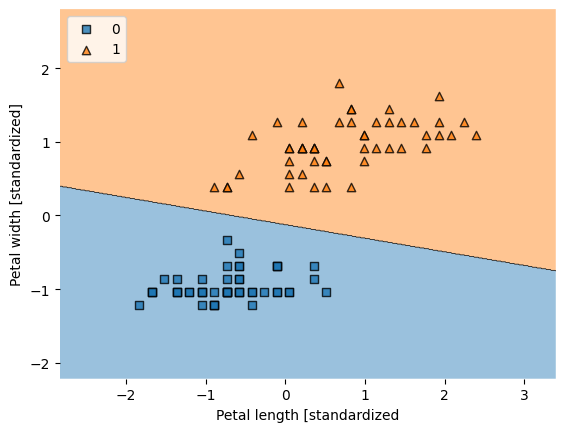

In [63]:
plot_decision_regions(X=X_scaled,
                      y=y,
                      clf=lrgd)

plt.xlabel('Petal length [standardized')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')

In [64]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_scaled, y)

LogisticRegression()

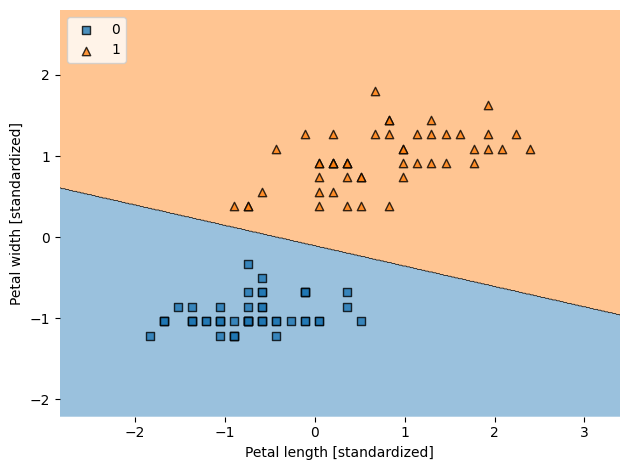

In [65]:
plot_decision_regions(X_scaled, y, clf=lr)
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()

As in the case of Perceptron, we get the weights of the model by the coef_ attribute.

In [66]:
lr.coef_

array([[0.810273  , 3.22257593]])

We can interpret the weights of the Logistic Regression classifier as the importance or sensitivity of the feature associated with a specific coefficient.

We take Iris dataset as an example and the weights of the previous classifier and predict the label of a point close the decision boundary.

In [67]:
lr.predict([[-1, 0]])

array([0])

If we move the point in the direction of the less important weight, i.e. w_1, we can apply a large shift without modifying the predicted label.

We need to check.

In [68]:
lr.predict([[-4, 0]])

array([0])

Otherwise, a small increase to the direction of the largest weight may result into a change of the prediction.

In [69]:
lr.predict([[-1, 3]])

array([1])

This Logistic Model is more sensitive to changes in the feature at index 2 corresponding to w_2 than to changes in the feature 1.
Feature 2 is more important since it more heavily determine the prediction w.r.t. feature 1.

We can go inside the classifier by getting the probability prediction (?), the net input (decision_function).

In [70]:
lr.predict_proba(X_scaled[:10,:])

array([[0.96996917, 0.03003083],
       [0.97654305, 0.02345695],
       [0.98170503, 0.01829497],
       [0.98385028, 0.01614972],
       [0.97345334, 0.02654666],
       [0.87549533, 0.12450467],
       [0.9717398 , 0.0282602 ],
       [0.97345334, 0.02654666],
       [0.98742492, 0.01257508],
       [0.9866235 , 0.0133765 ]])

In [72]:
lr.decision_function(X_scaled[:10,:])

array([-3.47503974, -3.72885215, -3.98266455, -4.10957075, -3.60194594,
       -1.95044661, -3.53763349, -3.60194594, -4.36338316, -4.30078941])

In [73]:
lr.coef_.dot(X_scaled[0,:]) + lr.intercept_

array([-3.47503974])

In [74]:
expit(lr.coef_.dot(X_scaled[:10,:].T) + lr.intercept_)

array([[0.03003083, 0.02345695, 0.01829497, 0.01614972, 0.02654666,
        0.12450467, 0.0282602 , 0.02654666, 0.01257508, 0.0133765 ]])

In [75]:
lr.predict_log_proba(X_scaled[:10,:])

array([[-0.03049099, -3.50553073],
       [-0.02373644, -3.75258859],
       [-0.0184644 , -4.00112895],
       [-0.01628155, -4.1258523 ],
       [-0.02690539, -3.62885133],
       [-0.13296546, -2.08341207],
       [-0.02866721, -3.5663007 ],
       [-0.02690539, -3.62885133],
       [-0.01265482, -4.37603797],
       [-0.01346677, -4.31425618]])

In [76]:
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=8,
                           n_redundant=2)

lr_clf = LogisticRegression(penalty='none')
lr_clf.fit(X, y)

/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


LogisticRegression(penalty='none')

In [77]:
def odds(p):
    return p/(1 - p)

In [78]:
x_test = X[0,:]
w, b = lr_clf.coef_[0], lr_clf.intercept_[0]
p = expit(b + w.dot(x_test.T))

for j in range(len(x_test)): # for each dimension
    x_test_1 = x_test.copy()
    x_test_1[j] = x_test_1[j] + 1
    p_1 = expit(b + w.dot(x_test_1.T))
    print(f'weight: {w[j]}, exp_weight: {np.exp(w[j])} - Odds ratio: {odds(p_1) / odds(p)}')

weight: -0.3153186198176716, exp_weight: 0.7295563861106326 - Odds ratio: 0.7295563861106327
weight: -0.049633868746287516, exp_weight: 0.951577763087405 - Odds ratio: 0.951577763087405
weight: -0.07003148589448309, exp_weight: 0.9323644631146828 - Odds ratio: 0.9323644631146826
weight: -0.02394381652519714, exp_weight: 0.9763405624223761 - Odds ratio: 0.9763405624223759
weight: -0.17608042135545066, exp_weight: 0.8385505432539966 - Odds ratio: 0.8385505432539965
weight: -0.27099480886308397, exp_weight: 0.7626204552619881 - Odds ratio: 0.7626204552619883
weight: 0.6597780420968574, exp_weight: 1.9343629396080182 - Odds ratio: 1.9343629396080178
weight: 0.037158639266499705, exp_weight: 1.0378576527560328 - Odds ratio: 1.0378576527560328
weight: 4.058206136780485e-05, exp_weight: 1.0000405828848309 - Odds ratio: 1.0000405828848309
weight: 0.11495120485800224, exp_weight: 1.121818696933798 - Odds ratio: 1.1218186969337978


In [79]:
X_scaled = StandardScaler().fit_transform(X)

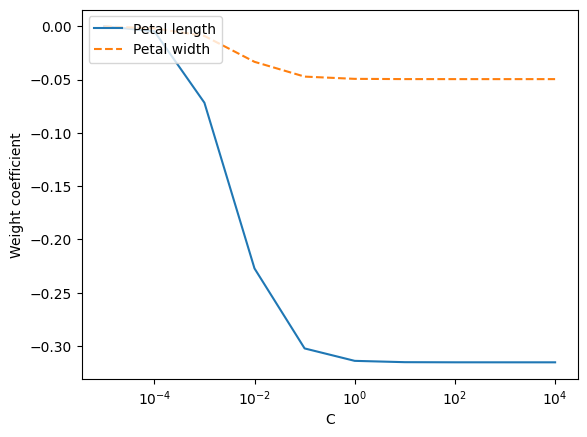

In [80]:
weights, params = [], []

for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c)
    lr.fit(X, y)
    weights.append(lr.coef_[0])
    params.append(10.**c)

weights = np.array(weights)

plt.plot(params, weights[:, 0],
         label='Petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='Petal width')
plt.ylabel('Weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')

In [81]:
lr_unreg = LogisticRegression(penalty='none')
lr_reg_l2 = LogisticRegression(penalty='l2', C=0.01)
lr_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)
lr_unreg.fit(X, y)
lr_reg_l2.fit(X, y)
lr_reg_l1.fit(X, y)

print(lr_unreg.coef_[0])
print(lr_reg_l2.coef_[0])
print(lr_reg_l1.coef_[0])

[-3.15318620e-01 -4.96338687e-02 -7.00314859e-02 -2.39438165e-02
 -1.76080421e-01 -2.70994809e-01  6.59778042e-01  3.71586393e-02
  4.05820614e-05  1.14951205e-01]
[-0.22724089 -0.03340976 -0.06211881 -0.03601209 -0.15147427 -0.2161377
  0.51414452  0.00507928 -0.02486683  0.07846294]
[ 0.          0.         -0.03617871  0.         -0.03344377 -0.09199289
  0.48610019  0.          0.          0.        ]


/Users/alex_k/Desktop/Machine-Learning-Course/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1183: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


In [86]:
colors = ['blue', 'green', 'red', 'cyan','magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue']
weights, params = [], []

for c in np.arange(-4., 6.):
    lr_clf = LogisticRegression(penalty='l1', solver='liblinear', C = 10.**c)
    lr_clf.fit(X,y)
    weights.append(lr_clf.coef_[0])
    params.append(10.**c)
print(weights)

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), array([ 0.        ,  0.        , -0.03620195,  0.        , -0.03345609,
       -0.09192382,  0.48610685,  0.        ,  0.        ,  0.        ]), array([-0.17944539, -0.05186004, -0.06069845,  0.        , -0.06975465,
       -0.28522999,  0.68181154,  0.04992721, -0.0475428 ,  0.        ]), array([-0.19548418, -0.02056931, -0.1177957 ,  0.        , -0.07119802,
       -0.29679654,  0.73746734,  0.13819997, -0.01927822,  0.        ]), array([-0.19718036, -0.01727076, -0.12383624,  0.        , -0.07134696,
       -0.29802319,  0.74348952,  0.1474948 , -0.01629419,  0.        ]), array([-0.21332756, -0.10529235, -0.02254573,  0.07327833, -0.05639732,
       -0.36758384,  0.72177229,  0.07671151, -0.05708437,  0.00608097]), array([-0.30295795, -0.07324339, -0.04527984,  0.00316751, -0.1557367 ,
       -0.29733366,  0.6650783 ,  0.03052703, -0.0155808 ,  0.09986495]), array([-0.2764159 , -0.09